# Big data Project 2
## William Sivutha Poch 5938122

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/amzreviewauto/reviews_Automotive.json
/kaggle/input/amzautometa/meta_Automotive.json


### Dataset from ***[Amazon product data](http://jmcauley.ucsd.edu/data/amazon/links.html) Julian McAuley, UCSD*** uploaded to Kaggle.

## Load dataset


### Dataset used is: Automotive	[reviews](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Automotive.json.gz) (1,373,768 reviews)	[metadata](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Automotive.json.gz) (331,090 products)
Metadata is invalid format for JSON file. <br>
Specifically, the metadata files seem to have been created with single quotes *''* rather than double quotes *""* as is JSON syntax. <br> 
The script below fixes this issue.

In [2]:
import json
import ast

fr=open("/kaggle/input/amzautometa/meta_Automotive.json")
fw=open("/kaggle/working/fix.json", "w")

for line in fr:
    json_dat = json.dumps(ast.literal_eval(line))
    dict_dat = json.loads(json_dat)
    json.dump(dict_dat, fw)
    fw.write("\n")

fw.close()
fr.close()

### Metadata

In [3]:
metadf = pd.read_json('/kaggle/working/fix.json', lines=True)
metadf.head(10)

,asin,categories,description,title,price,imUrl,brand,related,salesRank
0,0219400083,"[[Automotive, Lights & Lighting Accessories, L...",HID Xenon high and low beam lighting system pr...,Can-Am 219400083 HID Xenon Lighting System,654.99,http://ecx.images-amazon.com/images/I/415rqKdW...,Can-Am,"{'also_viewed': ['B006IEOIZ0', 'B00AFWJGB2', '...",NaN
1,0715000322,"[[Automotive, Motorcycle & Powersports, Parts,...",Keep your hands warm while riding with this ea...,Can-Am 715000322 ATV Heated Hand Grip Kit,72.94,http://ecx.images-amazon.com/images/I/417FMGcI...,Can-Am,"{'also_viewed': ['B000GZLKEO', 'B00A8MOZJC', '...",NaN
2,0970408641,"[[Automotive, Replacement Parts, Window Regula...",Roll 2 windows up; Automatic temperature Contr...,Scytek ACCWR-8 2 Windows Roll-up Module,22.95,http://ecx.images-amazon.com/images/I/41trxn9p...,ScyTek Electronics,"{'also_viewed': ['B0009SWLEQ', 'B004IAC2EA']}",NaN
3,1940825172,"[[Automotive, Exterior Accessories, Towing Pro...",Kampflaufer IV-A - Jagdluther - Model - Dust T...,Kampflaufer Iv-a - Jagdluther,29.53,http://ecx.images-amazon.com/images/I/51kYgec5...,Dust Tactics,"{'also_bought': ['1616612231', '1616611642', '...",{'Toys & Games': 371545}
4,2409862403,"[[Automotive, Interior Accessories, Antitheft,...",Description:\nThis Keyless Entry System offers...,Car Remote Central Lock Kit Keyless Entry Syst...,13.92,http://ecx.images-amazon.com/images/I/41L9bxim...,NaN,"{'buy_after_viewing': ['B006QH9C5A', 'B001ANXN...",NaN
5,3293390102,"[[Automotive, Lights & Lighting Accessories, B...",Featured here is a pair (2 pieces) of our CREE...,JLC CREE 5W High Power SMD 3156 3157 3457 4157...,25.99,http://ecx.images-amazon.com/images/I/31j6gWCT...,NaN,NaN,NaN
6,3696387606,"[[Automotive, Lights & Lighting Accessories, L...",Featured here is a pair (2 pieces) of our 9005...,JLC 9005 CREE LED Light Bulbs - CREE Q5 LED Chips,25.99,http://ecx.images-amazon.com/images/I/41AH9Ghr...,NaN,"{'also_viewed': ['B00C022YPA', 'B00GXSGY8K']}",NaN
7,3696387622,"[[Automotive, Lights & Lighting Accessories, B...","JLC Lightings is the sole seller of this item,...",JLC CREE 5W High Power SMD 921 194 2825 W5W LE...,27.99,http://ecx.images-amazon.com/images/I/31dmxGIO...,NaN,"{'also_viewed': ['B008G4Y076', 'B00ASB2536', '...",NaN
8,3696390119,"[[Automotive, Lights & Lighting Accessories, B...",Featured here is a pair (2 pieces) of our CREE...,JLC CREE 5W High Power SMD 1156 7506 P21W S25 ...,29.99,http://ecx.images-amazon.com/images/I/31inJRuA...,NaN,"{'also_viewed': ['B003TLNURC', 'B00GU7MCD0', '...",NaN
9,4678615123,"[[Automotive, Paint, Body & Trim, Paints & Pri...","ul>Formulated to match, restore or change colo...",SEM Paints (SEM15123) Color Coat - Santa Fe Ae...,8.46,http://ecx.images-amazon.com/images/I/31VJYEje...,Sem Products,"{'also_viewed': ['B00098PO3G', 'B00B057Y7G', '...",NaN


### Reviews Dataset

In [4]:
df = pd.read_json('/kaggle/input/amzreviewauto/reviews_Automotive.json', lines=True)
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A108J5O7DG2WIM,0219400083,Julio Csar,"[0, 0]",I loved the look and the great improvement at ...,4,Great improvement for my Spyder,1376697600,"08 17, 2013"
1,A1QBLUSZW281TA,0715000322,Angelo Aresco,"[0, 0]","Put these on my 2011 can am outlander 800xt, e...",5,Warm and toasty hands,1396915200,"04 8, 2014"
2,A3B40ZIZJ3HEP7,0970408641,derrick,"[1, 1]","Don't buy this item , its not a 4 window roll...",1,garbage,1332115200,"03 19, 2012"
3,A1DUAXYX5WHSX1,1940825172,Craig Sheeley,"[0, 0]","Nice. A decent model, and at a better price on...",4,Nice. A decent model,1404691200,"07 7, 2014"
4,A1VS7YWE0NCAS3,2409862403,DOC HOLLADAY,"[0, 0]",I used this rating because I liked the key fob...,4,Good Key Remote Fob,1381363200,"10 10, 2013"
5,AY04DS9CPM1YH,2409862403,timothy a hickle,"[0, 0]",There aren't any instructions included so I ha...,1,where are the instructions to this gadget,1381449600,"10 11, 2013"
6,A2HHDDYLFIQWYA,3293390102,Jonathan,"[0, 0]",I was very pleased with this LED. I used it a...,3,great light output but did not last long,1364342400,"03 27, 2013"
7,A12T7O6K54JTJM,3696387606,James M. Sueverkruepp,"[0, 0]",Delivery was faster than expected. Installed a...,2,Short life,1396569600,"04 4, 2014"
8,A1UXFMMV5CPPJQ,3696387622,Bill,"[0, 0]",Use these in addition to an LED license plate ...,5,Wow brite,1381881600,"10 16, 2013"
9,AR040DQNCVR0H,3696387622,d. man,"[0, 0]",Replaced by reverse light with these and the a...,5,SUPER BRIGHT,1362182400,"03 2, 2013"


### Merge metadata and review data

In [5]:
df = pd.merge(df, metadf, on=['asin'])
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,categories,description,title,price,imUrl,brand,related,salesRank
0,A108J5O7DG2WIM,0219400083,Julio Csar,"[0, 0]",I loved the look and the great improvement at ...,4,Great improvement for my Spyder,1376697600,"08 17, 2013","[[Automotive, Lights & Lighting Accessories, L...",HID Xenon high and low beam lighting system pr...,Can-Am 219400083 HID Xenon Lighting System,654.99,http://ecx.images-amazon.com/images/I/415rqKdW...,Can-Am,"{'also_viewed': ['B006IEOIZ0', 'B00AFWJGB2', '...",NaN
1,A1QBLUSZW281TA,0715000322,Angelo Aresco,"[0, 0]","Put these on my 2011 can am outlander 800xt, e...",5,Warm and toasty hands,1396915200,"04 8, 2014","[[Automotive, Motorcycle & Powersports, Parts,...",Keep your hands warm while riding with this ea...,Can-Am 715000322 ATV Heated Hand Grip Kit,72.94,http://ecx.images-amazon.com/images/I/417FMGcI...,Can-Am,"{'also_viewed': ['B000GZLKEO', 'B00A8MOZJC', '...",NaN
2,A3B40ZIZJ3HEP7,0970408641,derrick,"[1, 1]","Don't buy this item , its not a 4 window roll...",1,garbage,1332115200,"03 19, 2012","[[Automotive, Replacement Parts, Window Regula...",Roll 2 windows up; Automatic temperature Contr...,Scytek ACCWR-8 2 Windows Roll-up Module,22.95,http://ecx.images-amazon.com/images/I/41trxn9p...,ScyTek Electronics,"{'also_viewed': ['B0009SWLEQ', 'B004IAC2EA']}",NaN
3,A1DUAXYX5WHSX1,1940825172,Craig Sheeley,"[0, 0]","Nice. A decent model, and at a better price on...",4,Nice. A decent model,1404691200,"07 7, 2014","[[Automotive, Exterior Accessories, Towing Pro...",Kampflaufer IV-A - Jagdluther - Model - Dust T...,Kampflaufer Iv-a - Jagdluther,29.53,http://ecx.images-amazon.com/images/I/51kYgec5...,Dust Tactics,"{'also_bought': ['1616612231', '1616611642', '...",{'Toys & Games': 371545}
4,A1VS7YWE0NCAS3,2409862403,DOC HOLLADAY,"[0, 0]",I used this rating because I liked the key fob...,4,Good Key Remote Fob,1381363200,"10 10, 2013","[[Automotive, Interior Accessories, Antitheft,...",Description:\nThis Keyless Entry System offers...,Car Remote Central Lock Kit Keyless Entry Syst...,13.92,http://ecx.images-amazon.com/images/I/41L9bxim...,NaN,"{'buy_after_viewing': ['B006QH9C5A', 'B001ANXN...",NaN


### Select only reviews and their scores

In [6]:
reviews_df = df[['asin','reviewText','overall','brand', 'title']]
reviews_df.head(5)

,asin,reviewText,overall,brand,title
0,0219400083,I loved the look and the great improvement at ...,4,Can-Am,Can-Am 219400083 HID Xenon Lighting System
1,0715000322,"Put these on my 2011 can am outlander 800xt, e...",5,Can-Am,Can-Am 715000322 ATV Heated Hand Grip Kit
2,0970408641,"Don't buy this item , its not a 4 window roll...",1,ScyTek Electronics,Scytek ACCWR-8 2 Windows Roll-up Module
3,1940825172,"Nice. A decent model, and at a better price on...",4,Dust Tactics,Kampflaufer Iv-a - Jagdluther
4,2409862403,I used this rating because I liked the key fob...,4,NaN,Car Remote Central Lock Kit Keyless Entry Syst...


### Distribution of ratings

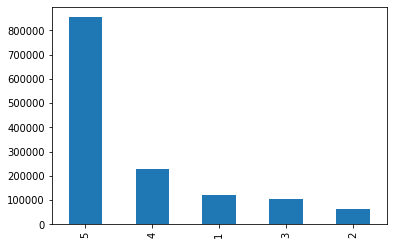

In [7]:
reviews_df['overall'].value_counts().plot(kind='bar')

We can see that the ratings are heavily in favor of 5 star ratings.

### Number of unique brands

In [8]:
brand_num = reviews_df['brand'].unique()
print(len(brand_num))

8025


### Set all text to lower case for easier processing

In [9]:
reviews_df['reviewText'] = reviews_df['reviewText'].str.lower()
# reviews_df['overall'] = reviews_df['overall']
reviews_df.head(5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,asin,reviewText,overall,brand,title
0,0219400083,i loved the look and the great improvement at ...,4,Can-Am,Can-Am 219400083 HID Xenon Lighting System
1,0715000322,"put these on my 2011 can am outlander 800xt, e...",5,Can-Am,Can-Am 715000322 ATV Heated Hand Grip Kit
2,0970408641,"don't buy this item , its not a 4 window roll...",1,ScyTek Electronics,Scytek ACCWR-8 2 Windows Roll-up Module
3,1940825172,"nice. a decent model, and at a better price on...",4,Dust Tactics,Kampflaufer Iv-a - Jagdluther
4,2409862403,i used this rating because i liked the key fob...,4,NaN,Car Remote Central Lock Kit Keyless Entry Syst...


### Remove punctuations

In [10]:
import re
reviews_df['reviewText'] = reviews_df['reviewText'].str.replace('[^\w\s]','')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
reviews_df['reviewText'][2]

'dont buy this item   its not a 4 window roll up  its look nothing like the picture  they sent me some crap  and the seller is charging me 20  restocking fee plus i have to pay for shipping  i will never buy from them again  you have been warned '

## Sentiment Analysis
### Using nltk to retrieve sentiment and sentiment score

In [12]:
all_reviews = reviews_df['reviewText']
all_sent_values = []
all_sentiments = []
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


#### NLTK Sentiment Intensity Analyzer

In [13]:
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

### Sample review

In [14]:
sample = reviews_df['reviewText'][1234]
print(sample)
print('Sentiment | Original ')
print(sentiment_value(sample),'/1    |', reviews_df['overall'][1510],'/5')


our quad was getting so slow and would not hold a charge and decided to invest in a new battery so glad we did as that thing zips around the yard like it was brand new it is almost 6 years old and we thought it was going thanks for getting our granddaughter back up and enjoying her quad
Sentiment | Original 
0.9 /1    | 5 /5


## Run sentiment analysis

### Perform sentiment analysis on x rows.
Since there are over 1M reviews, let's take only some for testing.

In [15]:
for i in reviews_df['reviewText'][0:30000]:
    all_sent_values.append(sentiment_value(i))

In [16]:
SENT_SCORE = []
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,30000):
    sent = all_sent_values[i]
    if (sent<=1 and sent>0.5):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(sent)
        SENT_SCORE.append(5)
    elif (sent<=0.5 and sent > 0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(sent)
        SENT_SCORE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(sent)
        SENT_SCORE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(sent)
        SENT_SCORE.append(2)
    else:
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(sent)
        SENT_SCORE.append(1)

In [17]:
temp = reviews_df[0:30000]
temp['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp['SENTIMENT'] = SENTIMENT
temp['SENT_SCORE'] = SENT_SCORE
temp[['reviewText','overall', 'brand', 'SENTIMENT_VALUE', 'SENTIMENT', 'SENT_SCORE']].head(5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,reviewText,overall,brand,SENTIMENT_VALUE,SENTIMENT,SENT_SCORE
0,i loved the look and the great improvement at ...,4,Can-Am,0.7,Positive,5
1,put these on my 2011 can am outlander 800xt ea...,5,Can-Am,0.7,Positive,5
2,dont buy this item its not a 4 window roll u...,1,ScyTek Electronics,-0.7,Negative,1
3,nice a decent model and at a better price on a...,4,Dust Tactics,0.2,Positive,4
4,i used this rating because i liked the key fob...,4,NaN,0.5,Positive,4


In [18]:
temp['SENTIMENT_VALUE'].value_counts().plot(kind='bar')

NameError: name 'temp_data' is not defined

### Check for accuracy

In [ ]:
counter = 0
for i in range(0,30000):
    if (abs(temp['overall'][i]-temp['SENT_SCORE'][i])>1):
        counter += 1

accuracy = (temp.shape[0]-counter)/temp.shape[0]
percent_accuracy = accuracy*100
print('%', percent_accuracy)

### Select brands to calculate trust
Let's take 5 brands to start with.

In [ ]:
print(len(temp['brand'].unique()))

### Top brands

In [ ]:
brand_df = pd.pivot_table(temp,index=['brand'],values=['overall', 'SENT_SCORE','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
brand_df = brand_df.sort_values(by=('sum', 'overall'), ascending = False)
brand_df.head(10)

### Sentiment values for each brand

In [ ]:
AutoVentshade = []
BonAire = []
CIPA = []
KampNENGINEERING = []
KampN = []



for i in range(0,30000):
    score = all_sent_values[i]
    brand = temp['brand'][i]
    if (brand == 'Auto Ventshade'):
        AutoVentshade.append(score)
    elif (brand == 'Bon-Aire'):
        BonAire.append(score)
    elif (brand == 'CIPA'):
        CIPA.append(score)
    elif (brand == 'K&amp;N ENGINEERING'):
        KampNENGINEERING.append(score)
    elif (brand == 'K&amp;N'):
        KampN.append(score)
    else:
        continue

In [ ]:
l_brands = [AutoVentshade, BonAire, CIPA, KampNENGINEERING, KampN]
n_brands = ['AutoVentshade', 'BonAire', 'CIPA', 'KampNENGINEERING', 'KampN']

### Number of reviews per brand

In [ ]:
for l in l_brands:
    print(len(l))

### Plot the distribution of sentiment scores across different brands

In [ ]:
from matplotlib import pylab
from pylab import *
def plot_brand(brand, name):
    pylab.figure(figsize=(20,3))
    x = range(0,500)
    
    pylab.ylabel('Sentiment')
    pylab.title(name)
    pylab.plot(x, brand[:500], color='#4A148C', linestyle='none', marker='o',ms=9, alpha = 0.4)
    
    pylab.show()

In [ ]:
for i in range(0,len(l_brands)):
    plot_brand(l_brands[i],n_brands[i])

### Sum and Mean Plots of Rating with Sentiments

In [ ]:
names = brand_df.index[:10]
y = brand_df['sum', 'SENT_SCORE'][:10]
y2 = brand_df['sum', 'overall'][:10]



pylab.figure(figsize=(15,7))
x = range(10)
pylab.subplot(2,1,1)
pylab.xticks(x, names)
pylab.ylabel('Summed Values')
pylab.title('Total Sum Values')
pylab.plot(x,y,"r-",x,y2,'b-')
pylab.legend(['SentimentValue', 'Ratings'])

y_new = brand_df['mean', 'SENT_SCORE'][:10]
y2_new = brand_df['mean', 'overall'][:10]



pylab.figure(figsize=(15,7))


pylab.subplot(2,1,2)
pylab.xticks(x, names)
pylab.ylabel('Mean Values')
pylab.title('Mean Values')
pylab.plot(x,y_new,"r-",x,y2_new,'b-')
pylab.legend(['SentimentValue', 'Ratings'])


pylab.show()

### Calculate Trust
Since we are only using reviews, we only have 1 dimension.

In [ ]:
def positive(brands, num):
    pos = 0
    for i in range(0,len(brands[num])):
        if (abs(brands[num][i])>0):
            pos += 1
    return pos

In [ ]:
def negative(brands, num):
    neg = 0
    for i in range(0,len(brands[num])):
        if (brands[num][i])<0:
             neg += 1
    return neg

In [ ]:
def get_trust(l_brands, n_brands):
    trust = []
    for i in range(len(n_brands)):
        trust.append((positive(l_brands, i)/(positive(l_brands, i)+negative(l_brands, i)))*5)
    return trust
trust_1 = get_trust(l_brands, n_brands)
print(trust_1)

### Trust weight

In [ ]:
def get_weight(l_brands, n_brands):
    weight = []
    for i in range(len(n_brands)):
        weight.append((positive(l_brands, i)+negative(l_brands, i))/(positive(l_brands, i)+negative(l_brands, i)))
    return weight
weight_1 = get_weight(l_brands, n_brands)
print(weight_1)

### Overall trust score

In [ ]:
def get_overall_trust(trust, weight, n_brands):
    t_brands = []
    for i in range(len(n_brands)):
        t_brands.append(trust[i]*weight[i])
    return t_brands
tbrands = get_overall_trust(trust_1, weight_1, n_brands)
print(tbrands)

### Average Ratings

In [ ]:
total_ratings = [0,0,0,0,0]
review_count = [0,0,0,0,0]
for i in range(0,30000):
    brand = temp['brand'][i]
    if (brand == 'Auto Ventshade'):
        total_ratings[0] += temp['overall'][i]
        review_count[0] += 1
    elif (brand == 'Bon-Aire'):
        total_ratings[1] += temp['overall'][i]
        review_count[1] += 1
    elif (brand == 'CIPA'):
        total_ratings[2] += temp['overall'][i]
        review_count[2] += 1
    elif (brand == 'K&amp;N ENGINEERING'):
        total_ratings[3] += temp['overall'][i]
        review_count[3] += 1
    elif (brand == 'K&amp;N'):
        total_ratings[4] += temp['overall'][i]
        review_count[4] += 1
    else:
        continue

In [ ]:
ratings = []
for i in range(len(total_ratings)):
    ratings.append(total_ratings[i]/review_count[i])
print(ratings)

### Results

In [ ]:
output = (n_brands, tbrands, ratings)
print(output)

In [ ]:
print("Output: (brand, trust, ratings)")
for i in range(len(n_brands)):
    print(output[0][i], output[1][i], output[2][i])

### Perform sentiment analysis on more data rows.
*Running sentiment analysis on all 1.3M records would take forever to complete so 100K records are used instead.*

In [ ]:
for i in all_reviews[:100000]:
    all_sentiments.append(sentiment_value(i))

In [ ]:
SENT_SCORE2 = []
SENTIMENT_VALUE2 = []
SENTIMENT2 = []
for i in range(0,100000):
    sent = all_sentiments[i]
    if (sent<=1 and sent>0.5):
        SENTIMENT2.append('Positive')
        SENTIMENT_VALUE2.append(sent)
        SENT_SCORE2.append(5)
    elif (sent<=0.5 and sent > 0):
        SENTIMENT2.append('Positive')
        SENTIMENT_VALUE2.append(sent)
        SENT_SCORE2.append(4)
    elif (sent==0):
        SENTIMENT2.append('Neutral')
        SENTIMENT_VALUE2.append(sent)
        SENT_SCORE2.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT2.append('Negative')
        SENTIMENT_VALUE2.append(sent)
        SENT_SCORE2.append(2)
    else:
        SENTIMENT2.append('Negative')
        SENTIMENT_VALUE2.append(sent)
        SENT_SCORE2.append(1)

In [ ]:
temp_data = reviews_df[:100000]
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE2
temp_data['SENTIMENT'] = SENTIMENT2
temp_data['SENT_SCORE'] = SENT_SCORE2
temp_data[['brand', 'overall', 'SENTIMENT_VALUE', 'SENTIMENT', 'SENT_SCORE']].head(5)

In [ ]:
temp_data['SENTIMENT_VALUE'].value_counts().plot(kind='bar')

### Accuracy

In [ ]:
counter = 0
for i in range(0,30000):
    if (abs(temp['overall'][i]-temp['SENT_SCORE'][i])>1):
        counter += 1

accuracy = (temp.shape[0]-counter)/temp.shape[0]
percent_accuracy = accuracy*100
print('%', percent_accuracy)

### Select top 10 brands

In [ ]:
brand_df2 = pd.pivot_table(temp,index=['brand'],values=['overall', 'SENT_SCORE','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
brand_df2 = brand_df.sort_values(by=('sum', 'overall'), ascending = False)
brand_df2.head(10)

### Since there are so many brands, let's take the top 10.

In [ ]:
AutoVentshade = []
BonAire = []
CIPA = []
KampNENGINEERING = []
KampN = []
Lexol = []
Superior = []
FisherPrice = []
Dynamat = []
Wolo = []

for i in range(0,100000):
    score = all_sentiments[i]
    brand = temp_data['brand'][i]
    if (brand == 'Auto Ventshade'):
        AutoVentshade.append(score)
    elif (brand == 'Bon-Aire'):
        BonAire.append(score)
    elif (brand == 'CIPA'):
        CIPA.append(score)
    elif (brand == 'K&amp;N ENGINEERING'):
        KampNENGINEERING.append(score)
    elif (brand == 'K&amp;N'):
        KampN.append(score)
    elif (brand == 'Lexol'):
        Lexol.append(score)
    elif (brand == 'Superior'):
        Superior.append(score)
    elif (brand == 'Fisher-Price'):
        FisherPrice.append(score)
    elif (brand == 'Dynamat'):
        Dynamat.append(score)
    elif (brand == 'Wolo'):
        Wolo.append(score)
    else:
        continue

In [ ]:
l_brands2 = [AutoVentshade, BonAire, CIPA, KampNENGINEERING, KampN, Lexol, Superior, FisherPrice, Dynamat, Wolo]
n_brands2 = ['AutoVentshade', 'BonAire', 'CIPA', 'KampNENGINEERING', 'KampN', 'Lexol', 'Superior', 'FisherPrice', 'Dynamat', 'Wolo']

### Number of reviews per brand

In [ ]:
for l in l_brands2:
    print(len(l))

### Plot the distribution of sentiment scores across different brands

In [ ]:
def plot_brand2(brand, name):
    pylab.figure(figsize=(20,3))
    x = range(0,600)
    
    pylab.ylabel('Sentiment')
    pylab.title(name)
    pylab.plot(x, brand[:600], color='#4A148C', linestyle='none', marker='o',ms=9, alpha = 0.4)
    
    pylab.show()

In [ ]:
for i in range(0,len(l_brands2)):
    plot_brand2(l_brands2[i],n_brands2[i])

### Sum and Mean Plots of Rating with Sentiments

In [ ]:
names2 = brand_df2.index[:10]
yy = brand_df2['sum', 'SENT_SCORE'][:10]
yy2 = brand_df2['sum', 'overall'][:10]

pylab.figure(figsize=(15,7))
xx = range(10)
pylab.subplot(2,1,1)
pylab.xticks(xx, names2)
pylab.ylabel('Summed Values')
pylab.title('Total Sum Values')
pylab.plot(xx,yy,"r-",xx,yy2,'b-')
pylab.legend(['SentimentValue', 'Ratings'])

y_new2 = brand_df2['mean', 'SENT_SCORE'][:10]
y2_new2 = brand_df2['mean', 'overall'][:10]

pylab.figure(figsize=(15,7))

pylab.subplot(2,1,2)
pylab.xticks(xx, names)
pylab.ylabel('Mean Values')
pylab.title('Mean Values')
pylab.plot(xx,y_new2,"r-",xx,y2_new2,'b-')
pylab.legend(['SentimentValue', 'Rating'])

pylab.show()

### Calculate trust, weights, and overall trust.
Since we only use reviews we have 1 dimension.

In [ ]:
print("Trust: ")
trust_2 = get_trust(l_brands2, n_brands2)
print(trust_2)
print("Weights: ")
weight_2 = get_weight(l_brands2, n_brands2)
print(weight_2)
print("Overall Trust: ")
t_brands2 = get_overall_trust(trust_2, weight_2, n_brands2)
print(t_brands2)

### Calculate average ratings

In [ ]:
total_ratings2 = [0,0,0,0,0,0,0,0,0,0]
review_count2 = [0,0,0,0,0,0,0,0,0,0]
for i in range(0,30000):
    brand = temp_data['brand'][i]
    if (brand == 'Auto Ventshade'):
        total_ratings2[0] += temp['overall'][i]
        review_count2[0] += 1
    elif (brand == 'Bon-Aire'):
        total_ratings2[1] += temp['overall'][i]
        review_count2[1] += 1
    elif (brand == 'CIPA'):
        total_ratings2[2] += temp['overall'][i]
        review_count2[2] += 1
    elif (brand == 'K&amp;N ENGINEERING'):
        total_ratings2[3] += temp['overall'][i]
        review_count2[3] += 1
    elif (brand == 'K&amp;N'):
        total_ratings2[4] += temp['overall'][i]
        review_count2[4] += 1
    elif (brand == 'Lexol'):
        total_ratings2[5] += temp['overall'][i]
        review_count2[5] += 1
    elif (brand == 'Superior'):
        total_ratings2[6] += temp['overall'][i]
        review_count2[6] += 1
    elif (brand == 'Fisher-Price'):
        total_ratings2[7] += temp['overall'][i]
        review_count2[7] += 1
    elif (brand == 'Dynamat'):
        total_ratings2[8] += temp['overall'][i]
        review_count2[8] += 1
    elif (brand == 'Wolo'):
        total_ratings2[9] += temp['overall'][i]
        review_count2[9] += 1
    else:
        continue

In [ ]:
ratings2 = []
for i in range(len(total_ratings2)):
    ratings2.append(total_ratings2[i]/review_count2[i])
print(ratings2)

## Results

In [ ]:
output2 = (n_brands2, t_brands2, ratings2)
print(output2)

In [ ]:
print("Output: (brand, trust, ratings)")
for i in range(len(n_brands2)):
    print(output2[0][i], output2[1][i], output2[2][i])